# Retail Store Data Analysis
### By: Mark Ehab Aziz
#### (Built Under Pyhon 3.11.4)
#### **Note: Importing the dataset could take up to sub 50s**
Given data of transactions, we are tasked to use *"Unsupervised Machine Learning Models"* to classify and cluster.

# Dependency Checklist
Ensure that the following modules are installed:
- Pandas
- Numpy
- Seaborn
- Matplotlib
- Openpyxl

In [2]:
# Importing Libraries
import pandas as pd                # Dataframe operations and input
import numpy as np                 # Numerical operations, Linear Alg
import seaborn as sns              # Visualising

In [3]:
# Loading Data
# Like the previous project
# I'm using 2 methods to import data
# 1 - Path to Different Folder (Within my Github Repo)
retail_dat = pd.read_excel("../dataset/Online Retail.xlsx")

# 2 - Path within same file
#retail_dat = pd.read_excel("./Online Retail.xlsx")

# Data Exploration
Using `.head(n)` and `.tail(n)` to inspect the $n^{th}$ rows.

Using `.info()` for information regarding columns.

Using `.describe()` to give statistical information about numeric columns.

In [4]:
# Defining nth row to view on head or tail
n = 5

# Viewing head and tail (Same Output Cell)
display(retail_dat.head(n), retail_dat.tail(n))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# Showing General Information about Columns
retail_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Expected `InvoiceNo` to be all `int64` (Outliers are what make it an `Object`)\
Expected `CustomerID` to be `int64` (Type casting into `int64`)\
Missing Values at `CustomerID` (Vital-ish, Loss of $135,080$ rows ($\approx25\%$)) and `Description`\
Rest seems nominal

In [6]:
# Data Description
retail_dat.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Outliers on `Quantity` $\rightarrow$ Negative Values, Absurd Maximum\
Outliers on `UnitPrice` $\rightarrow$ Negative Values, Absurd Maximum

# Data Cleaning
Removing incorrect or missing data

In [7]:
# Dropping rows with NA values (Mainly within CustomerID Column)
retail_dat.dropna(inplace = True)

In [8]:
# Negatives can be considered as Refunds (Will be dropped later)

print("Minimum value for Quantity: {}".format(min(retail_dat['Quantity'])))
print("Minimum value for Price: {}".format(min(retail_dat['UnitPrice'])))


Minimum value for Quantity: -80995
Minimum value for Price: 0.0


<Axes: >

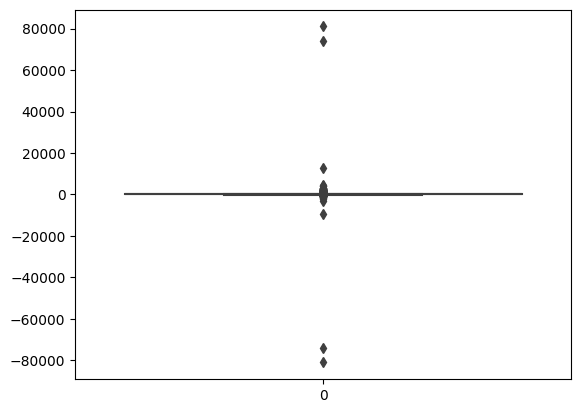

In [9]:
# Getting more visuals
sns.boxplot(retail_dat['Quantity'])

Looking at the above graph, there is a somewhat total symmetry between the 2 outliers around 80k, which may suggest a refund for what has been bought, therefore should also be removed, and filtered around `<20000 && >0`.\

As well as suggesting that these are "Bulk Buyers" instead of normal buyers which would buy in lesser quantities.

<Axes: >

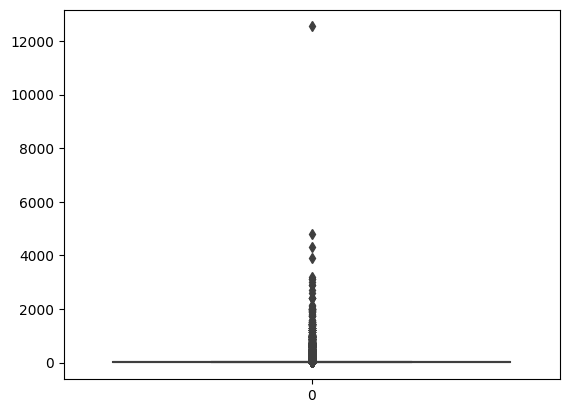

In [10]:
retail_dat = retail_dat[(retail_dat['Quantity'] < 20000) & (retail_dat['Quantity'] > 0)]
sns.boxplot(retail_dat['Quantity'])

<Axes: >

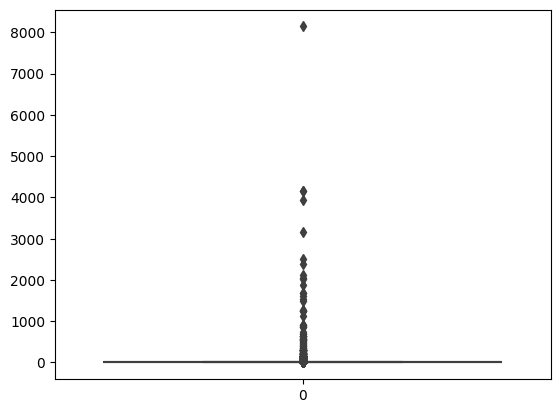

In [11]:
# getting a visual feel for the prices
sns.boxplot(retail_dat['UnitPrice'])

Taking a look at the data, the above negative value seems to be for adjusting bad debt, will be removed as it doesn't have anything to do with sales\
Therefore the removed values will be the negatives.

<Axes: >

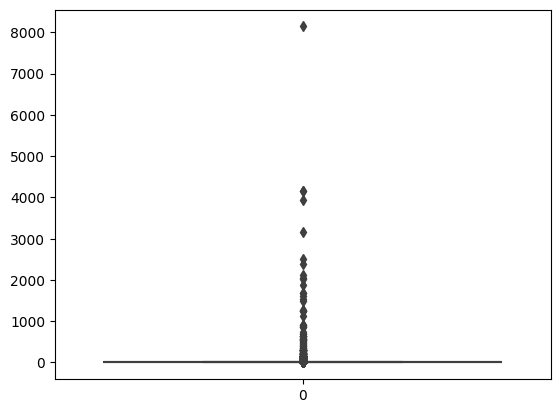

In [12]:
retail_dat = retail_dat[(retail_dat['UnitPrice'] > 0) & (retail_dat['UnitPrice'] < 20000)]
sns.boxplot(retail_dat['UnitPrice'])

Taking another look, we see that there still remains outliers here, from another look under the description column, we notice:
- DOTCOM POSTAGE
- CRUK Commission
- Manual
\
\
From a quick google, it is suggested that DOTCOM POSTAGE and POSTAGE are just related to post office business, which has no effect on sales, therefore will be removed.\
Another google shows that CRUK is related to cancer research in the UK, which does not contribute anything to sales, will be removed as well\
Manual is ambigious and has no meaning, so it would also be safer to drop

In [13]:
# Initalising a list of values that we want to remove
desc_drop = ['DOTCOM POSTAGE', 'POSTAGE','CRUK Commission', 'Manual']

# Dropping through reassignment
# where we assign values that are not in the above list
retail_dat = retail_dat[~retail_dat['Description'].isin(desc_drop)]

# Printing current info, description
display(retail_dat.describe(), retail_dat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 396483 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396483 non-null  object        
 1   StockCode    396483 non-null  object        
 2   Description  396483 non-null  object        
 3   Quantity     396483 non-null  int64         
 4   InvoiceDate  396483 non-null  datetime64[ns]
 5   UnitPrice    396483 non-null  float64       
 6   CustomerID   396483 non-null  float64       
 7   Country      396483 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.2+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396483.000000,396483,396483.000000,396483.000000
mean,12.616665,2011-07-11 00:05:58.005917184,2.884392,15301.441479
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:40:00,3.750000,16801.000000
max,4800.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,42.794114,NaN,4.354877,1709.755409


None

There are still some seemingly above 3rd quartile averages and quantities, which we will be removing using the IQR method.

In [14]:
# Initialising a copy of dataframe
# Comparison Reasons
prep_dat = retail_dat.copy(deep = True)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,370818.000000,370818,370818.000000,370818.000000
mean,7.042754,2011-07-11 07:52:35.570279680,2.980762,15317.174091
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-07 11:31:45,1.250000,13993.000000
50%,4.000000,2011-08-01 10:26:00,1.950000,15214.000000
75%,12.000000,2011-10-21 12:44:00,3.750000,16813.000000
max,26.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,6.663630,NaN,4.341899,1707.892017


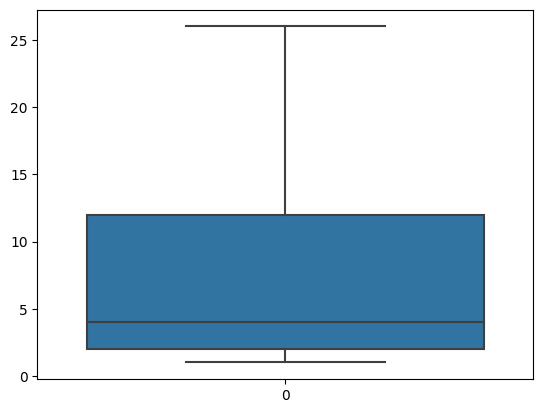

In [15]:
# Values of quantiles to acquire IQR from their difference
quantity_perc25 = prep_dat['Quantity'].quantile(0.25)
quantity_perc75 = prep_dat['Quantity'].quantile(0.75)

# IQR
iqr = quantity_perc75 - quantity_perc25

# We only need an upper limit, the lower has been adjusted for
upper_lim = quantity_perc75 + 1.5 * iqr

# Filtering
prep_dat = prep_dat[prep_dat['Quantity'] < upper_lim]

sns.boxplot(prep_dat['Quantity'])
prep_dat.describe()

The above graph looks more plausible, and no outliers, it's now time for the adjustment for price

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,337342.000000,337342,337342.000000,337342.000000
mean,7.484446,2011-07-12 16:56:58.658393856,2.183318,15325.980649
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-08 08:27:00,1.250000,13994.000000
50%,6.000000,2011-08-03 13:39:00,1.650000,15246.000000
75%,12.000000,2011-10-23 14:47:00,2.950000,16818.000000
max,26.000000,2011-12-09 12:50:00,7.460000,18287.000000
std,6.769771,NaN,1.530323,1710.719613


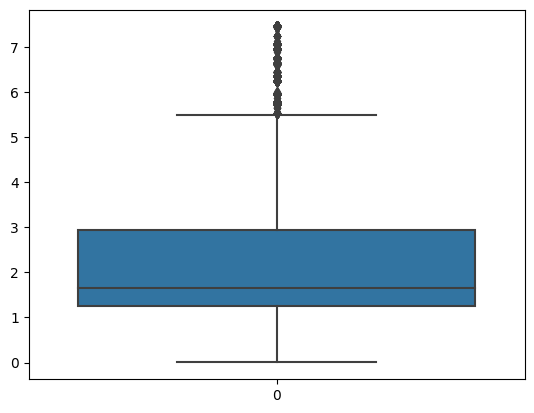

In [16]:
# Values of quantiles to acquire IQR from their difference
price_perc25 = prep_dat['UnitPrice'].quantile(0.25)
price_perc75 = prep_dat['UnitPrice'].quantile(0.75)

# IQR
iqr = price_perc75 - price_perc25

# We only need an upper limit, the lower has been adjusted for
upper_lim = price_perc75 + 1.5 * iqr

# Filtering
prep_dat = prep_dat[prep_dat['UnitPrice'] < upper_lim]

sns.boxplot(prep_dat['UnitPrice'])
prep_dat.describe()

Not as clean as the graph for quanitity, but this is also way better than before, with less outliers.

Stored 'retail_dat' (DataFrame)
Stored 'prep_dat' (DataFrame)


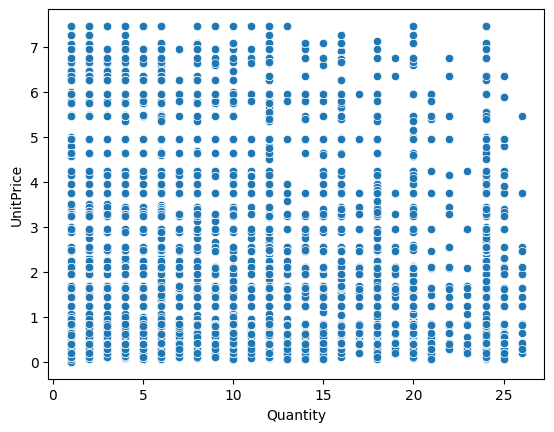

In [17]:
# Graphing a relation between quantity of items and prices
sns.scatterplot(prep_dat, x = prep_dat['Quantity'], y = prep_dat['UnitPrice'])

# Passing the preprocessed data into the general store to use within another notebook
%store retail_dat
%store prep_dat

The noise that is present in the above graph shows that there is a degree of randomness where people buy units at different prices, which seems nominal for the retail store, as different people need different quantities of items with varying prices.

# Unsupervised Machine Learning Models
We will be using about 3 models:
- KMeans
- Hierarchial

Whilst also including minimal plots to aid understanding

In [18]:
# Modules to be used
from sklearn.cluster import KMeans                  # Importing KMeans
from sklearn.cluster import AgglomerativeClustering # Importing what will be used for Hierarchial
from matplotlib import pyplot as plt                # Plotting tools

In [62]:
# Selecting columns from data
# to be used as clustering basis
col_idx = [5, 3]
cluster_cols = prep_dat.iloc[:, col_idx].values

# Note: Below cell takes a runtime of $\approx 2m$
The entire cell was made due to me not realised that I was using the unclean data, and hence felt the need to run multiple random seeds to find the one that gives the sharpest elbow.

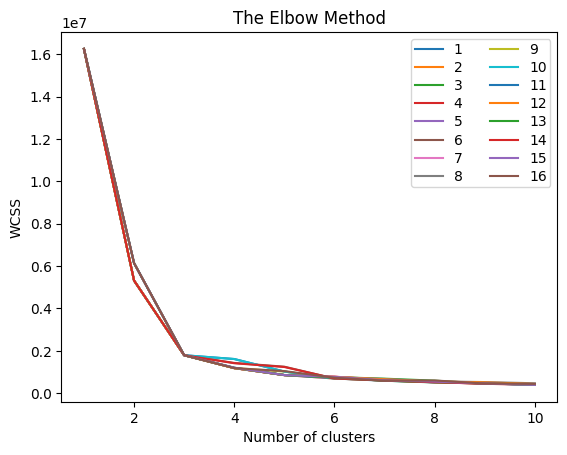

Random Seed with the smallest value at cluster 4: 4


In [72]:
# Plotting "Elbow-Graph"
# Within-Cluster-Sum-of-Squares
# (Sum of squares of distance
# of each data point in all clusters
# to their respective centroids)
wcss = []

# All the wcss stored here
# at cluster value 3
# (I saw that it has the sharpest elbow)
wcss_total = []

# Number of seeds to be tested
seed_amt = 16

# Running different seeds
for rand_stat in range(1, seed_amt + 1):
    for num_clust in range(1, 11):
        # Initalising Kmeans
        # - n_clusters: varies according to loop
        # - k-means++ : selects initial cluster centroids
        #               using sampling based on an
        #               empirical probability distribution
        #               of the points
        # As a consqeuence:
        # - n_init: 1
        #           if init was another (i.e. random)
        #           n_init would've been best defaulted at 10
        # - random state: deterministic (we know the outcome) randomness
        kmeans = KMeans(n_clusters = num_clust, init = 'k-means++', random_state = rand_stat, n_init = 1)
        kmeans.fit(cluster_cols)
        wcss.append(kmeans.inertia_)
    
    # Storing the values at the 3rd cluster
    wcss_total.append(wcss[2])

    # plots
    plt.plot(range(1, 11), wcss, label = rand_stat)
    plt.legend(loc = "upper right", ncols = 2, borderpad = 0.25, labelspacing = 0.3)
    wcss.clear()

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Seed at which wcss is least at cluster count 3
min_seed = wcss_total.index(min(wcss_total)) + 1
cluster_num = 3

print("Random Seed with the smallest value at cluster 4: {}".format(min_seed))

In [73]:
kmeans = KMeans(n_clusters = cluster_num, init = 'k-means++', random_state = min_seed, n_init = 1)
y_kmeans = kmeans.fit_predict(cluster_cols)

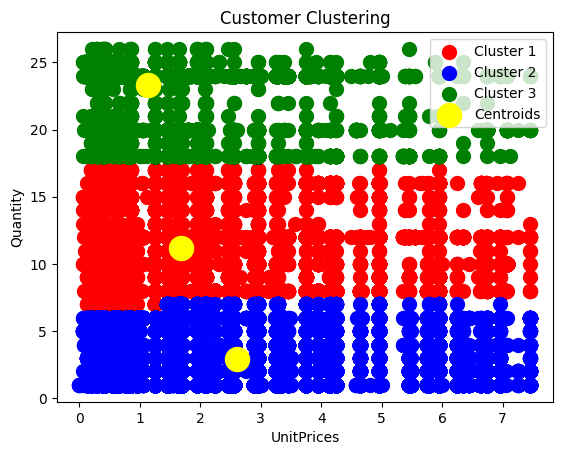

In [74]:
# Visualising the clusters
plt.scatter(cluster_cols[y_kmeans == 0, 0], cluster_cols[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_cols[y_kmeans == 1, 0], cluster_cols[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster_cols[y_kmeans == 2, 0], cluster_cols[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.title('Customer Clustering')
plt.xlabel('UnitPrices')
plt.ylabel('Quantity')
plt.legend(loc = 'upper right')
plt.show()